# User routes on the site
## Description
**Clickstream** is a sequence of user actions on a website. It allows you to understand how users interact with the site. In this task, you need to find the most frequent custom routes.

## Input data
Input data is а table with clickstream data in file `hdfs:/data/clickstream.csv`.

### Table structure
* `user_id (int)` - Unique user identifier.
* `session_id (int)` - Unique identifier for the user session. The user's session lasts until the identifier changes.
* `event_type (string)` - Event type from the list:
    * **page** - visit to the page
    * **event** - any action on the page
    * <b>&lt;custom&gt;</b> - string with any other type
* `event_type (string)` - Page on the site.
* `timestamp (int)` - Unix-timestamp of action.

### Browser errors
Errors can sometimes occur in the user's browser - after such an error appears, we can no longer trust the data of this session and all the following lines after the error or at the same time with it are considered corrupted and **should not be counted** in statistics.

When an error occurs on the page, a random string containing the word **error** will be written to the `event_type` field.

### Sample of user session
<pre>
+-------+----------+------------+----------+----------+
|user_id|session_id|  event_type|event_page| timestamp|
+-------+----------+------------+----------+----------+
|    562|       507|        page|      main|1620494781|
|    562|       507|       event|      main|1620494788|
|    562|       507|       event|      main|1620494798|
|    562|       507|        page|    family|1620494820|
|    562|       507|       event|    family|1620494828|
|    562|       507|        page|      main|1620494848|
|    562|       507|wNaxLlerrorU|      main|1620494865|
|    562|       507|       event|      main|1620494873|
|    562|       507|        page|      news|1620494875|
|    562|       507|        page|   tariffs|1620494876|
|    562|       507|       event|   tariffs|1620494884|
|    562|       514|        page|      main|1620728918|
|    562|       514|       event|      main|1620729174|
|    562|       514|        page|   archive|1620729674|
|    562|       514|        page|     bonus|1620729797|
|    562|       514|        page|   tariffs|1620731090|
|    562|       514|       event|   tariffs|1620731187|
+-------+----------+------------+----------+----------+
</pre>

#### Correct user routes for a given user:
* **Session 507**: main-family-main
* **Session 514**: main-archive-bonus-tariffs

Route elements are ordered by the time they appear in the clickstream, from earliest to latest.

The route must be accounted for completely before the end of the session or an error in the session.

## Task
You need to use the Spark SQL, Spark RDD and Spark DF interfaces to create a solution file, the lines of which contain **the 30 most frequent user routes** on the site.

Each line of the file should contain the `route` and `count` values **separated by tabs**, where:
* `route` - route on the site, consisting of pages separated by "-".
* `count` - the number of user sessions in which this route was.

The lines must be **ordered in descending order** of the `count` field.

## Criteria
You can get maximum of 3.5 points (final grade) for this assignment, depedning on the number of interface you manage to leverage. The criteria are as follows:

* 0.5 points – Spark SQL solution with 1 query
* 0.5 points – Spark SQL solution with <=2 queries
* 0.5 points – Spark RDD solution
* 0.5 points – Spark DF solution
* 0.5 points – your solution algorithm is relatively optimized, i.e.: no O^2 or O^3 complexities; appropriate object usage; no data leaks etc. This is evaluated by staff.
* 1 point – 1 on 1 screening session. During this session staff member can ask you questions regarding your solution logic, framework usage, questionable parts of your code etc. If your code is clean enough, the staff member can just ask you to solve a theoretical problem connected to Spark.


# Spark SQL (1.0 point - Spark SQL solution with <=2 queries)

## Solution with <=2 queries

In [ ]:
import findspark
findspark.init()

import json
import pyspark
from pyspark.sql import SparkSession, Row

In [ ]:
sc = pyspark.SparkContext(appName='jupyter')
se = SparkSession(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2024-11-07 20:15:12,109 WARN yarn.Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [ ]:
! hadoop fs -copyFromLocal . /

copyFromLocal: `/work/sga_task_Litvinchuk (1) (1).ipynb': File exists
copyFromLocal: `/work/.ipynb_checkpoints/sga_task_Litvinchuk (1) (1)-checkpoint.ipynb': File exists
copyFromLocal: `/work/sga-task.ipynb': File exists
copyFromLocal: `/work/hdfs-task.ipynb': File exists
copyFromLocal: `/work/clickstream.csv': File exists


In [ ]:
! hadoop fs -ls -h . /data

Found 1 items
drwxr-xr-x   - jovyan supergroup          0 2024-11-07 20:15 .sparkStaging
Found 2 items
-rw-r--r--   1 root   supergroup     30.7 M 2023-09-24 20:38 /data/clickstream.csv
drwxr-xr-x   - root   supergroup          0 2023-09-24 20:38 /data/transactions


In [ ]:
df_clickstream = se.read.options(delimiter="\t", header=True).csv("hdfs:///data/clickstream.csv")
df_clickstream.registerTempTable("clickstream")
df_clickstream.limit(2).toPandas()

,user_id,session_id,event_type,event_page,timestamp
0,562,507,page,main,1695584127
1,562,507,event,main,1695584134


In [ ]:
df_clickstream.limit(21).toPandas()

,user_id,session_id,event_type,event_page,timestamp
0,562,507,page,main,1695584127
1,562,507,event,main,1695584134
2,562,507,event,main,1695584144
3,562,507,event,main,1695584147
4,562,507,wNaxLlerrorU,main,1695584154
5,562,507,event,main,1695584154
6,562,507,event,main,1695584154
7,562,507,event,main,1695584160
8,562,507,page,rabota,1695584166
9,562,507,event,rabota,1695584174


In [ ]:
sql30 = se.sql(
"""
WITH cte_error AS (
    SELECT
        user_id,
        session_id,
        timestamp,
        True is_error
    FROM
        clickstream
    WHERE
        event_type LIKE "%error%"),

    cte_shift_event AS (
    SELECT
        user_id,
        session_id,
        event_type,
        event_page,
        timestamp,
        LAG(event_page) OVER (PARTITION BY user_id, session_id ORDER BY timestamp ASC) next_event
    FROM
        clickstream),

    cte_join_error_and_shift_event AS (
    SELECT
        cl.user_id,
        cl.session_id,
        cl.event_type,
        cl.event_page,
        cl.timestamp,
        cl.next_event,
        err.is_error
    FROM cte_shift_event cl
    LEFT JOIN cte_error err
    ON
        cl.user_id = err.user_id
        AND cl.session_id = err.session_id
        AND cl.timestamp >= err.timestamp),

    cte_event_without_error AS (
    SELECT
        user_id,
        session_id,
        event_page
    FROM cte_join_error_and_shift_event
    WHERE
        is_error IS NULL
        AND NOT event_page = next_event
        OR next_event IS NULL),

    cte_routes AS (
    SELECT
        CONCAT_WS('-', COLLECT_LIST(event_page)) route
    FROM
        cte_event_without_error
    GROUP BY
        user_id, session_id
    ORDER
        BY user_id, session_id)

SELECT
    route,
    COUNT(*) count
FROM
    cte_routes
GROUP BY
    route
ORDER BY
    count DESC
LIMIT 30;
"""
)

In [ ]:
sql30.toPandas()

,route,count
0,main,8184
1,main-archive,1111
2,main-rabota,1045
3,main-internet,896
4,main-bonus,870
5,main-news,769
6,main-tariffs,677
7,main-online,587
8,main-vklad,518
9,main-rabota-archive,170


In [ ]:
sql30.toPandas().set_index('route')['count'].to_json('sql_solution.json')

In [ ]:
sql30.toPandas().to_csv('sql_solution.csv', sep='\t', index=False)

## Description

Common table expressions are used for better code readability.

1)
```
cte_error AS (
SELECT
    user_id,
    session_id,
    timestamp,
    True is_error
FROM
    clickstream
WHERE
    event_type LIKE "%error%")
```

This part is for identifying events where there is an error.

In [ ]:
#example
se.sql("""
SELECT
    user_id,
    session_id,
    timestamp,
    event_type,
    True is_error
FROM
    clickstream
WHERE
    event_type LIKE "%error%"
LIMIT 10;
""").toPandas()

,user_id,session_id,timestamp,event_type,is_error
0,562,507,1695584154,wNaxLlerrorU,True
1,4567,514,1695584351,mAXExoCXerror,True
2,461,174,1695584529,uvjferrorYYwYlubX,True
3,844,258,1695584652,kfIpzqTUaerrorSQD,True
4,461,174,1695584698,iVerrornrA,True
5,805,626,1695585321,KMerroregFAtiwWL,True
6,4567,514,1695586124,HMJRIuGerrorHmdW,True
7,3972,31,1695586342,verrorDc,True
8,512,781,1695586400,WYQWVerror,True
9,512,781,1695586562,JCXPLQZerrorvaBt,True


2)
```
cte_shift_event AS (
SELECT
    user_id,
    session_id,
    event_type,
    event_page,
    timestamp,
    LAG(event_page) OVER (PARTITION BY user_id, session_id ORDER BY timestamp ASC) next_event
FROM
    clickstream)
```
In this part, we set a shift to determine the user's next event in the session. If you just look at the pages (event_type = page), the statistics will be distorted by duplicate visits to the page.

In [ ]:
#example
se.sql("""
SELECT
    *,
    LAG(event_page) OVER (PARTITION BY user_id, session_id ORDER BY timestamp ASC) next_event
FROM
    clickstream
LIMIT 10;
""").toPandas()

,user_id,session_id,event_type,event_page,timestamp,next_event
0,1,1026,page,main,1700148765,None
1,10,762,page,main,1699442253,None
2,10,762,page,internet,1699442893,main
3,10,762,event,internet,1699443462,internet
4,10,762,event,internet,1699444244,internet
5,10,762,event,internet,1699445640,internet
6,10,762,event,internet,1699449575,internet
7,10,762,event,internet,1699450822,internet
8,10,762,page,archive,1699450919,internet
9,10,762,page,bonus,1699451247,archive


3)
```
cte_join_error_and_shift_event AS (
SELECT
    cl.user_id,
    cl.session_id,
    cl.event_type,
    cl.event_page,
    cl.timestamp,
    cl.next_event,
    err.is_error
FROM cte_shift_event cl
LEFT JOIN cte_error err
ON
    cl.user_id = err.user_id
    AND cl.session_id = err.session_id
    AND cl.timestamp >= err.timestamp)
```
Here we join  the two previous parts related to the user and the session, and extend previously defined errors by a time equal to or greater than the time the error occurred in the user's session.

4)
```
cte_event_without_error AS (
SELECT
    user_id,
    session_id,
    event_page
FROM cte_join_error_and_shift_event
WHERE
    is_error IS NULL
    AND NOT event_page = next_event
    OR next_event IS NULL)
```
Additionally filter events, leaving those in which there are no errors and where the user changed the page during the session.

5)
```
cte_routes AS (
SELECT
    CONCAT_WS('-', COLLECT_LIST(event_page)) route
FROM
    cte_event_without_error
GROUP BY
    user_id, session_id
ORDER
    BY user_id, session_id)
```
Next, we group the data by user and session. And we make a list of events based on grouped data.

In [ ]:
#example
se.sql("""
SELECT
    CONCAT_WS('-', COLLECT_LIST(event_page)) route
FROM (
    SELECT
        user_id,
        session_id,
        event_page
    FROM (
        SELECT
            cl.user_id,
            cl.session_id,
            cl.event_type,
            cl.event_page,
            cl.timestamp,
            cl.next_event,
            err.is_error
        FROM (
            SELECT
                *,
                LAG(event_page) OVER (PARTITION BY user_id, session_id ORDER BY timestamp ASC) next_event
            FROM
                clickstream
            LIMIT 100) cl
        LEFT JOIN (
            SELECT
                user_id,
                session_id,
                timestamp,
                True is_error
            FROM
                clickstream
            WHERE
                event_type LIKE "%error%") err
        ON
            cl.user_id = err.user_id
            AND cl.session_id = err.session_id
            AND cl.timestamp >= err.timestamp
        ORDER BY
            cl.user_id, cl.session_id, cl.timestamp) temp
    WHERE
        is_error IS NULL
        AND NOT event_page = next_event
        OR next_event IS NULL) temp1
GROUP BY
    user_id, session_id
ORDER
    BY user_id, session_id;
""").toPandas()

,route
0,main
1,main-internet-archive-bonus-internet-main-rabo...
2,main-bonus-internet-online
3,main-news-internet-rabota-bonus
4,main-archive
5,main
6,main-internet-main-rabota-vklad-online-news-in...


5)
```
SELECT
    route,
    COUNT(*) count
FROM
    cte_routes
GROUP BY
    route
ORDER BY
    count DESC
LIMIT 30;
```
At the end, we group the data according to the list of events (routes), count their number and sort them in descending order, leaving the top 30.

# Spark RDD

## Solution

In [ ]:
rdd = sc.textFile("hdfs:///data/clickstream.csv")

In [ ]:
def mapper(x):
    lst = x.split("\t")
    return [(lst[1], lst[0]), [lst[4], [lst[2], lst[3], lst[2].find("error")]]]

In [ ]:
def mapper_error(x):
    found_error = False
    last_route = None
    for event in x[1]:
        if found_error:
            event[1][2] = 1
        elif event[1][2] > -1:
            found_error = True
            event[1][2] = 1
        if last_route is None:
            last_route = event[1][1]
            event[1].append(None)
        else:
            event[1].append(last_route)
            last_route = event[1][1]
    return x

In [ ]:
def demapper(x):
    out = []
    for elem in x[1]:
        out.append([x[0], elem])
    return out

In [ ]:
def get_route(x):
    routes = []
    for event in x[1]:
        routes.append(event[1][1])
    return [x[0], "-".join(routes)]

In [ ]:
rdd30 = (
    rdd
    .map(mapper)
    .filter(lambda x: x[0][0] != "session_id")
    .groupByKey()
    .map(lambda x: [x[0], list(x[1])])
    .map(mapper_error)
    .flatMap(demapper)
    .filter(lambda x: x[1][1][2] == -1 and x[1][1][1] != x[1][1][3])
    .groupByKey()
    .map(lambda x: [x[0], list(x[1])])
    .map(get_route)
    .flatMap(lambda x: [(x[1], 1)])
    .groupByKey()
    .map(lambda x: (x[0], len(x[1])))
    .sortBy(lambda x: -x[1])
)

In [ ]:
rdd30.take(30)

[('main', 8185),
 ('main-archive', 1113),
 ('main-rabota', 1047),
 ('main-internet', 897),
 ('main-bonus', 870),
 ('main-news', 769),
 ('main-tariffs', 677),
 ('main-online', 587),
 ('main-vklad', 518),
 ('main-rabota-archive', 170),
 ('main-archive-rabota', 167),
 ('main-bonus-archive', 143),
 ('main-rabota-bonus', 139),
 ('main-news-rabota', 135),
 ('main-bonus-rabota', 135),
 ('main-archive-internet', 132),
 ('main-rabota-news', 130),
 ('main-internet-rabota', 129),
 ('main-archive-news', 126),
 ('main-rabota-internet', 124),
 ('main-internet-archive', 123),
 ('main-archive-bonus', 117),
 ('main-internet-bonus', 115),
 ('main-news-archive', 113),
 ('main-tariffs-internet', 113),
 ('main-news-internet', 109),
 ('main-archive-tariffs', 104),
 ('main-internet-news', 103),
 ('main-tariffs-archive', 103),
 ('main-rabota-main', 94)]

In [ ]:
rdd30.toDF().toPandas()[:30].set_index('_1')['_2'].to_json('rdd_solution.json')

In [ ]:
rdd30.toDF().toPandas()[:30].rename(columns={'_1':'route', '_2':'count'}).to_csv('rdd_solution.csv', sep='\t', index=False)

## Description

1)
```
def mapper(x):
    lst = x.split("\t")
    return [(lst[1], lst[0]), [lst[4], [lst[2], lst[3], lst[2].find("error")]]]
```
A mapper for creating a data structure.

In [ ]:
#example
#print(rdd.take(2))
#mapper('user_id\tsession_id\tevent_type\tevent_page\ttimestamp')
mapper('562\t507\tpage\tmain\t1695584127')

[('507', '562'), ['1695584127', ['page', 'main', -1]]]

2)
```
def mapper_error(x):    
    found_error = False
    last_route = None    
    for event in x[1]:        
        if found_error:
            event[1][2] = 1
        elif event[1][2] > -1:
            found_error = True
            event[1][2] = 1        
        if last_route is None:
            last_route = event[1][1]
            event[1].append(None)
        else:
            event[1].append(last_route)
            last_route = event[1][1]            
    return x
```
A mapper for marking lines with or after an error: if there is an error, it is 1, if not, then -1.

In [ ]:
#example
#rdd.map(mapper).take(10)
mapper_error([('507', '562'),
            [['1695584127', ['page', 'main', -1]],
             ['1695584134', ['event', 'main', -1]],
             ['1695584144', ['event', 'main', -1]],
             ['1695584147', ['event', 'main', -1]],
             ['1695584154', ['wNaxLlerrorU', 'main', 6]],
             ['1695584154', ['event', 'main', -1]],
             ['1695584154', ['event', 'main', -1]],
             ['1695584160', ['event', 'main', -1]],
             ['1695584166', ['page', 'rabota', -1]]]]
            )

[('507', '562'),
 [['1695584127', ['page', 'main', -1, None]],
  ['1695584134', ['event', 'main', -1, 'main']],
  ['1695584144', ['event', 'main', -1, 'main']],
  ['1695584147', ['event', 'main', -1, 'main']],
  ['1695584154', ['wNaxLlerrorU', 'main', 1, 'main']],
  ['1695584154', ['event', 'main', 1, 'main']],
  ['1695584154', ['event', 'main', 1, 'main']],
  ['1695584160', ['event', 'main', 1, 'main']],
  ['1695584166', ['page', 'rabota', 1, 'main']]]]

3)
```
def demapper(x):    
    out = []    
    for elem in x[1]:
        out.append([x[0], elem])        
    return out
```
A mapper for assigning event data to each user session.

In [ ]:
#example
demapper([('507', '562'),
         [['1695584127', ['page', 'main', -1, None]],
          ['1695584134', ['event', 'main', -1, 'main']],
          ['1695584144', ['event', 'main', -1, 'main']],
          ['1695584147', ['event', 'main', -1, 'main']],
          ['1695584154', ['wNaxLlerrorU', 'main', 1, 'main']],
          ['1695584154', ['event', 'main', 1, 'main']],
          ['1695584154', ['event', 'main', 1, 'main']],
          ['1695584160', ['event', 'main', 1, 'main']],
          ['1695584166', ['page', 'rabota', 1, 'main']]]]
        )

[[('507', '562'), ['1695584127', ['page', 'main', -1, None]]],
 [('507', '562'), ['1695584134', ['event', 'main', -1, 'main']]],
 [('507', '562'), ['1695584144', ['event', 'main', -1, 'main']]],
 [('507', '562'), ['1695584147', ['event', 'main', -1, 'main']]],
 [('507', '562'), ['1695584154', ['wNaxLlerrorU', 'main', 1, 'main']]],
 [('507', '562'), ['1695584154', ['event', 'main', 1, 'main']]],
 [('507', '562'), ['1695584154', ['event', 'main', 1, 'main']]],
 [('507', '562'), ['1695584160', ['event', 'main', 1, 'main']]],
 [('507', '562'), ['1695584166', ['page', 'rabota', 1, 'main']]]]

4)
```
def get_route(x):    
    routes = []    
    for event in x[1]:
        routes.append(event[1][1])        
    return [x[0], "-".join(routes)]
```
A mapper for getting routes from a list of data

In [ ]:
#example
get_route([('60', '3204'),
          [['1695589018', ['page', 'main', -1, None]],
           ['1695589071', ['page', 'internet', -1, 'main']]]]
         )

[('60', '3204'), 'main-internet']

5)
```
.map(mapper)  
.filter(lambda x: x[0][0] != "session_id")
.groupByKey()
.map(lambda x: [x[0], list(x[1])])
.map(mapper_error)
.flatMap(demapper)
.filter(lambda x: x[1][1][2] == -1 and x[1][1][1] != x[1][1][3])
.groupByKey()
.map(lambda x: [x[0], list(x[1])])
.map(get_route)
.flatMap(lambda x: [(x[1], 1)])
.groupByKey()
.map(lambda x: (x[0], len(x[1])))
.sortBy(lambda x: -x[1])
.take(30)
```
The main part:

**.map(mapper)**

- creating a data structure

**.filter(lambda x: x[0][0] != "session_id")**
    
- removing the header with the filter

**.groupByKey()**

- grouping by user and session

**.map(lambda x: [x[0], list(x[1])])**
    
- forming a list of time, events and error index

**.map(mapper_error)**

- marking up errors

**.flatMap(demapper)**

- assigning event data to each user session

**.filter(lambda x: x[1][1][2] == -1 and x[1][1][1] != x[1][1][3])**
    
- filter and leave the data error-free and with page changes

**.groupByKey()**

- grouping by user and session

**.map(lambda x: [x[0], list(x[1])])**

- getting a list of grouped data

**.map(get_route)**

- create roots from the list of events

**.flatMap(lambda x: [(x[1], 1)])**
    
- leaving only the roots and the number of 1

**.groupByKey()**
    
- grouping them by the name of the roots

**.map(lambda x: (x[0], len(x[1])))**

- counting the number of each of the roots

**.sortBy(lambda x: -x[1])**
- sorting in descending order of quantity

**.take(30)**

- bringing out the top 30


# Spark DF

## Solution

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType
from pyspark.sql.window import Window

In [ ]:
convert = F.udf(lambda x: "-".join(x), StringType())

In [ ]:
df_error = (
    df_clickstream
    .withColumn("is_error", F.col("event_type").contains("error"))
    .filter("is_error == True")
    .select("user_id", "session_id", "timestamp", "is_error")
)

df_error.show(10)

+-------+----------+----------+--------+
|user_id|session_id| timestamp|is_error|
+-------+----------+----------+--------+
|    562|       507|1695584154|    true|
|   4567|       514|1695584351|    true|
|    461|       174|1695584529|    true|
|    844|       258|1695584652|    true|
|    461|       174|1695584698|    true|
|    805|       626|1695585321|    true|
|   4567|       514|1695586124|    true|
|   3972|        31|1695586342|    true|
|    512|       781|1695586400|    true|
|    512|       781|1695586562|    true|
+-------+----------+----------+--------+
only showing top 10 rows



In [ ]:
df30 = (
    df_clickstream
    .alias("cl")
    .withColumn("next_event",
                F.lag("event_page",1)
                .over(Window.partitionBy("user_id", "session_id").orderBy("timestamp")))
    .join(df_error.alias("err"),
          (F.col("cl.user_id") == F.col("err.user_id")) &
          (F.col("cl.session_id") == F.col("err.session_id")) &
          (F.col("cl.timestamp") >= F.col("err.timestamp")),
         how = "left")
    .filter("is_error is null")
    .filter("next_event <> event_page OR next_event is null")
    .groupby('cl.user_id', 'cl.session_id')
    .agg(F.collect_list("event_page").alias("route"))
    .withColumn("route", convert(F.col("route")))
    .groupby("route")
    .count()
    .sort(F.desc("count"))
)

In [ ]:
df30.show(30, False)

+---------------------+-----+
|route                |count|
+---------------------+-----+
|main                 |8184 |
|main-archive         |1111 |
|main-rabota          |1045 |
|main-internet        |896  |
|main-bonus           |870  |
|main-news            |769  |
|main-tariffs         |677  |
|main-online          |587  |
|main-vklad           |518  |
|main-rabota-archive  |170  |
|main-archive-rabota  |167  |
|main-bonus-archive   |143  |
|main-rabota-bonus    |139  |
|main-news-rabota     |135  |
|main-bonus-rabota    |135  |
|main-archive-internet|132  |
|main-rabota-news     |130  |
|main-internet-rabota |129  |
|main-archive-news    |126  |
|main-rabota-internet |124  |
|main-internet-archive|123  |
|main-archive-bonus   |117  |
|main-internet-bonus  |115  |
|main-tariffs-internet|114  |
|main-news-archive    |113  |
|main-news-internet   |109  |
|main-archive-tariffs |104  |
|main-internet-news   |103  |
|main-tariffs-archive |103  |
|main-rabota-main     |94   |
+---------

In [ ]:
df30.toPandas()[:30].set_index('route')['count'].to_json('df_solution.json')

In [ ]:
df30.toPandas()[:30].to_csv('df_solution.csv', sep='\t', index=False)

## Description

```
convert = F.udf(lambda x: "-".join(x), StringType())   
```
An auxiliary function for converting a list to a string.

```
(
    df_clickstream
    .withColumn("is_error", F.col("event_type").contains("error"))
    .filter("is_error == True")
    .select("user_id", "session_id", "timestamp", "is_error")
)
```
Creating an auxiliary dataset with errors for their subsequent accounting in calculations.

More about creating a df_error:

**.withColumn("is_error", F.col("event_type").contains("error"))**
- creating a column with errors

**.filter("is_error == True")**
- leaving only the data with the error

**.select("user_id", "session_id", "timestamp", "is_error")**
- leaving only the data required for the solution

In [ ]:
#example
df_error.show(10)

+-------+----------+----------+--------+
|user_id|session_id| timestamp|is_error|
+-------+----------+----------+--------+
|    562|       507|1695584154|    true|
|   4567|       514|1695584351|    true|
|    461|       174|1695584529|    true|
|    844|       258|1695584652|    true|
|    461|       174|1695584698|    true|
|    805|       626|1695585321|    true|
|   4567|       514|1695586124|    true|
|   3972|        31|1695586342|    true|
|    512|       781|1695586400|    true|
|    512|       781|1695586562|    true|
+-------+----------+----------+--------+
only showing top 10 rows




```
(
    df_clickstream
    .alias("cl")
    .withColumn("next_event",
                F.lag("event_page",1)
                .over(Window.partitionBy("user_id", "session_id").orderBy("timestamp")))
    .join(df_error.alias("err"),
          (F.col("cl.user_id") == F.col("err.user_id")) &
          (F.col("cl.session_id") == F.col("err.session_id")) &
          (F.col("cl.timestamp") >= F.col("err.timestamp")),
         how = "left")
    .filter("is_error is null")
    .filter("next_event <> event_page OR next_event is null")
    .groupby('cl.user_id', 'cl.session_id')
    .agg(F.collect_list("event_page").alias("route"))
    .withColumn("route", convert(F.col("route")))
    .groupby("route")
    .count()
    .sort(F.desc("count"))
    .show(30, False)
)
```
The main part:

**.alias("cl")**
- Creating an alias to use the columns of this table in the future

**.withColumn("next_event",
        F.lag("event_page", 1)
        .over(Window.partitionBy("user_id", "session_id").orderBy("timestamp")))**
- Shifting the event_page column down one element to match the current event with a future event. We write the new data to the next_event column.

**.join(df_error.alias("err"),
      (F.col("cl.user_id") == F.col("err.user_id")) &
      (F.col("cl.session_id") == F.col("err.session_id")) &
      (F.col("cl.timestamp") >= F.col("err.timestamp")),
     how = "left")**
- Joining the current table with the table with errors by the user's session, filling in the events for the client's session with errors during and after the error.

**.filter("is_error is null")**
- Leaving only the events without error.

**.filter("next_event <> event_page OR next_event is null")**
- Leaving the events with the first page and with the page change.

**.groupby('cl.user_id', 'cl.session_id')**
- Grouping them by the client's session.

**.agg(F.collect_list("event_page").alias("route"))**
- Collecting events from the client's session into the routes.

**.withColumn("route", convert(F.col("route")))**
- Converting a list to a string.

**.groupby("route")**
- Grouping by the routes.

**.count()**
- Counting the number of routes.

**.sort(F.desc("count"))**
- Sorting in descending order of quantity

**.show(30, False)**
- Bringing out the top 30

# Checking in the grader. Everything is OK.

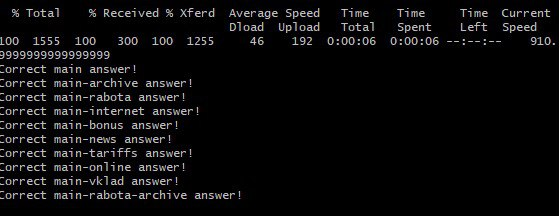

# Extra questions

## Why DF and SQL solutions differ?

Solutions for DF and SQL may differ from each other for the following reasons:

- logical filtering

In my case, this was the reason for the difference, so slightly different was the filtering logic, the placement of parentheses

(in SQL
```
is_error IS NULL
AND NOT event_page = next_event
OR next_event IS NULL
```
,in DF
```
.filter("is_error is null")
.filter("next_event <> event_page OR next_event is null")
```
correct SQL:
```
is_error IS NULL
AND (event_page != next_event
OR next_event IS NULL)
```
)

- merge parameters

In my case, they are the same.

- filtering logic
- aggregation logic
- differences in the behavior of functions

The three above reasons are checked during the code implementation process at intermediate stages.

- Differences in optimization strategy using Spark's Catalyst Optimizer

Perhaps there is an impact with differences in strategies, but in my case I did not notice such an impact.

The corrected code is shown below.

In [ ]:
sql30 = se.sql(
"""
WITH cte_error AS (
    SELECT
        user_id,
        session_id,
        timestamp,
        True is_error
    FROM
        clickstream
    WHERE
        event_type LIKE "%error%"),

    cte_shift_event AS (
    SELECT
        user_id,
        session_id,
        event_type,
        event_page,
        timestamp,
        LAG(event_page) OVER (PARTITION BY user_id, session_id ORDER BY timestamp ASC) next_event
    FROM
        clickstream),

    cte_join_error_and_shift_event AS (
    SELECT
        cl.user_id,
        cl.session_id,
        cl.event_type,
        cl.event_page,
        cl.timestamp,
        cl.next_event,
        err.is_error
    FROM cte_shift_event cl
    LEFT JOIN cte_error err
    ON
        cl.user_id = err.user_id
        AND cl.session_id = err.session_id
        AND cl.timestamp >= err.timestamp),

    cte_event_without_error AS (
    SELECT
        user_id,
        session_id,
        event_page
    FROM cte_join_error_and_shift_event
    WHERE
        is_error IS NULL
        AND (event_page != next_event
        OR next_event IS NULL)),

    cte_routes AS (
    SELECT
        CONCAT_WS('-', COLLECT_LIST(event_page)) route
    FROM
        cte_event_without_error
    GROUP BY
        user_id, session_id
    ORDER
        BY user_id, session_id)

SELECT
    route,
    COUNT(*) count
FROM
    cte_routes
GROUP BY
    route
ORDER BY
    count DESC
LIMIT 30;
"""
)

In [ ]:
sql30.toPandas()

,route,count
0,main,8184
1,main-archive,1111
2,main-rabota,1045
3,main-internet,896
4,main-bonus,870
5,main-news,769
6,main-tariffs,677
7,main-online,587
8,main-vklad,518
9,main-rabota-archive,170


In [ ]:
%%time

df30.show(30, False)

+---------------------+-----+
|route                |count|
+---------------------+-----+
|main                 |8184 |
|main-archive         |1111 |
|main-rabota          |1045 |
|main-internet        |896  |
|main-bonus           |870  |
|main-news            |769  |
|main-tariffs         |677  |
|main-online          |587  |
|main-vklad           |518  |
|main-rabota-archive  |170  |
|main-archive-rabota  |167  |
|main-bonus-archive   |143  |
|main-rabota-bonus    |139  |
|main-news-rabota     |135  |
|main-bonus-rabota    |135  |
|main-archive-internet|132  |
|main-rabota-news     |130  |
|main-internet-rabota |129  |
|main-archive-news    |126  |
|main-rabota-internet |124  |
|main-internet-archive|123  |
|main-archive-bonus   |117  |
|main-internet-bonus  |115  |
|main-tariffs-internet|114  |
|main-news-archive    |113  |
|main-news-internet   |109  |
|main-archive-tariffs |104  |
|main-internet-news   |103  |
|main-tariffs-archive |103  |
|main-rabota-main     |94   |
+---------

In [ ]:
df30.withColumnRenamed('count','df').join(sql30.withColumnRenamed('count','sql'), on='route').sort(F.desc('df')).show(30)

+--------------------+----+----+
|               route|  df| sql|
+--------------------+----+----+
|                main|8184|8184|
|        main-archive|1111|1111|
|         main-rabota|1045|1045|
|       main-internet| 896| 896|
|          main-bonus| 870| 870|
|           main-news| 769| 769|
|        main-tariffs| 677| 677|
|         main-online| 587| 587|
|          main-vklad| 518| 518|
| main-rabota-archive| 170| 170|
| main-archive-rabota| 167| 167|
|  main-bonus-archive| 143| 143|
|   main-rabota-bonus| 139| 139|
|    main-news-rabota| 135| 135|
|   main-bonus-rabota| 135| 135|
|main-archive-inte...| 132| 132|
|    main-rabota-news| 130| 130|
|main-internet-rabota| 129| 129|
|   main-archive-news| 126| 126|
|main-rabota-internet| 124| 124|
|main-internet-arc...| 123| 123|
|  main-archive-bonus| 117| 117|
| main-internet-bonus| 115| 115|
|main-tariffs-inte...| 114| 114|
|   main-news-archive| 113| 113|
|  main-news-internet| 109| 109|
|main-archive-tariffs| 104| 104|
|  main-in

## How can we speed-up the solution DF?

I suggest the following improvements speed-up the solution:

- exclude Join

The join operation can consume a large number of resources. Let's try to replace it with a window function, along with creating a separate df_error and merging, using Window to add eror_timestamp to df_click stream.

In the code:

```
error_window = Window.partitionBy("user_id", "session_id").orderBy("timestamp")

.withColumn("error_timestamp", F.min(F.when(F.col("event_type").contains("error"), F.col("timestamp"))).over(error_window))
```
- exclude UDF

Instead of UDF, you can use the built-in Spark functions. The built-in functions work faster because UDF provides a serialization/deserialization layer and line-by-line operations. Use concat_ws instead of convert.

- reduce the amount of data in the initial stages by using select

The code below applies these improvements.

In [ ]:
#old

In [ ]:
%%time

df30.show(30, False)

+---------------------+-----+
|route                |count|
+---------------------+-----+
|main                 |8184 |
|main-archive         |1112 |
|main-rabota          |1047 |
|main-internet        |895  |
|main-bonus           |870  |
|main-news            |769  |
|main-tariffs         |676  |
|main-online          |586  |
|main-vklad           |517  |
|main-rabota-archive  |170  |
|main-archive-rabota  |167  |
|main-bonus-archive   |143  |
|main-rabota-bonus    |139  |
|main-news-rabota     |135  |
|main-bonus-rabota    |135  |
|main-archive-internet|132  |
|main-rabota-news     |130  |
|main-internet-rabota |129  |
|main-archive-news    |126  |
|main-rabota-internet |124  |
|main-internet-archive|123  |
|main-archive-bonus   |117  |
|main-internet-bonus  |115  |
|main-tariffs-internet|114  |
|main-news-archive    |113  |
|main-news-internet   |109  |
|main-archive-tariffs |104  |
|main-internet-news   |103  |
|main-tariffs-archive |103  |
|main-rabota-main     |94   |
+---------

In [ ]:
#new

In [ ]:
%%time

error_window = Window.partitionBy("user_id", "session_id").orderBy("timestamp")

df30 = (
    df_clickstream
    .select("user_id", "session_id", "event_type", "event_page", "timestamp")
    .withColumn("error_timestamp", F.min(F.when(F.col("event_type").contains("error"), F.col("timestamp"))).over(error_window))
    .filter((F.col("error_timestamp").isNull()) | (F.col("timestamp") < F.col("error_timestamp")))
    .withColumn("prev_event_page", F.lag("event_page").over(error_window))
    .filter((F.col("prev_event_page").isNull()) | (F.col("event_page") != F.col("prev_event_page")))
    .groupBy("user_id", "session_id").agg(F.concat_ws("-", F.collect_list("event_page")).alias("route"))
    .groupby("route")
    .count()
    .sort(F.desc("count"))
)
df30.show(30, False)

+---------------------+-----+
|route                |count|
+---------------------+-----+
|main                 |8184 |
|main-archive         |1112 |
|main-rabota          |1047 |
|main-internet        |895  |
|main-bonus           |870  |
|main-news            |769  |
|main-tariffs         |676  |
|main-online          |586  |
|main-vklad           |517  |
|main-rabota-archive  |170  |
|main-archive-rabota  |167  |
|main-bonus-archive   |143  |
|main-rabota-bonus    |139  |
|main-news-rabota     |135  |
|main-bonus-rabota    |135  |
|main-archive-internet|132  |
|main-rabota-news     |130  |
|main-internet-rabota |129  |
|main-archive-news    |126  |
|main-rabota-internet |124  |
|main-internet-archive|123  |
|main-archive-bonus   |117  |
|main-internet-bonus  |115  |
|main-tariffs-internet|114  |
|main-news-archive    |113  |
|main-news-internet   |109  |
|main-archive-tariffs |104  |
|main-internet-news   |103  |
|main-tariffs-archive |103  |
|main-rabota-main     |94   |
+---------